In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2021-03-16T17:00:00,6,Friuli Venezia Giulia,530,77,607,14167,14774,336,672,...,15.0,10272.0,2998.0,331.0,12.69,4.11,6.54,22.41,10.00,2.33
386,2021-03-17T17:00:00,6,Friuli Venezia Giulia,538,76,614,14388,15002,228,986,...,15.0,13904.0,4732.0,221.0,12.38,4.09,7.09,20.84,-1.30,1.54
387,2021-03-18T17:00:00,6,Friuli Venezia Giulia,545,77,622,14904,15526,524,1058,...,19.0,12440.0,4347.0,516.0,12.38,4.01,8.50,24.34,1.32,3.49
388,2021-03-19T17:00:00,6,Friuli Venezia Giulia,547,77,624,15239,15863,337,910,...,21.0,11919.0,4158.0,335.0,12.34,3.93,7.63,21.89,0.00,2.17


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 906
Nuovi tamponi: 11337.0
Percentuale nuovi positivi/nuovi tamponi: 8.0 %
Nuovi guariti: 571.0
Nuovi deceduti: 14.0
Variazione positivi ricoverati con sintomi: 17.0
Variazione positivi in terapia intensiva: 3.0
Variazione positivi in isolamento dimiciliare: 301.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-19T17:00:00,6,Friuli Venezia Giulia,691,63,754,11831,12585,-100,454,...,18.0,10409.0,4098.0,-111.0,8.36,5.99,4.36,11.08,0.00,-0.79
1,2021-01-20T17:00:00,6,Friuli Venezia Giulia,693,58,751,11580,12331,-254,672,...,26.0,10820.0,6729.0,-251.0,7.72,6.09,6.21,9.99,-7.94,-2.02
2,2021-01-21T17:00:00,6,Friuli Venezia Giulia,680,59,739,11441,12180,-151,657,...,26.0,9985.0,6420.0,-139.0,7.98,6.07,6.58,10.23,1.72,-1.22
3,2021-01-22T17:00:00,6,Friuli Venezia Giulia,669,61,730,11360,12090,-90,452,...,23.0,7437.0,4816.0,-81.0,8.36,6.04,6.08,9.39,3.39,-0.74
4,2021-01-23T17:00:00,6,Friuli Venezia Giulia,672,63,735,11163,11898,-192,679,...,24.0,10239.0,3946.0,-197.0,8.57,6.18,6.63,17.21,3.28,-1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-16T17:00:00,6,Friuli Venezia Giulia,530,77,607,14167,14774,336,672,...,15.0,10272.0,2998.0,331.0,12.69,4.11,6.54,22.41,10.00,2.33
57,2021-03-17T17:00:00,6,Friuli Venezia Giulia,538,76,614,14388,15002,228,986,...,15.0,13904.0,4732.0,221.0,12.38,4.09,7.09,20.84,-1.30,1.54
58,2021-03-18T17:00:00,6,Friuli Venezia Giulia,545,77,622,14904,15526,524,1058,...,19.0,12440.0,4347.0,516.0,12.38,4.01,8.50,24.34,1.32,3.49
59,2021-03-19T17:00:00,6,Friuli Venezia Giulia,547,77,624,15239,15863,337,910,...,21.0,11919.0,4158.0,335.0,12.34,3.93,7.63,21.89,0.00,2.17


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

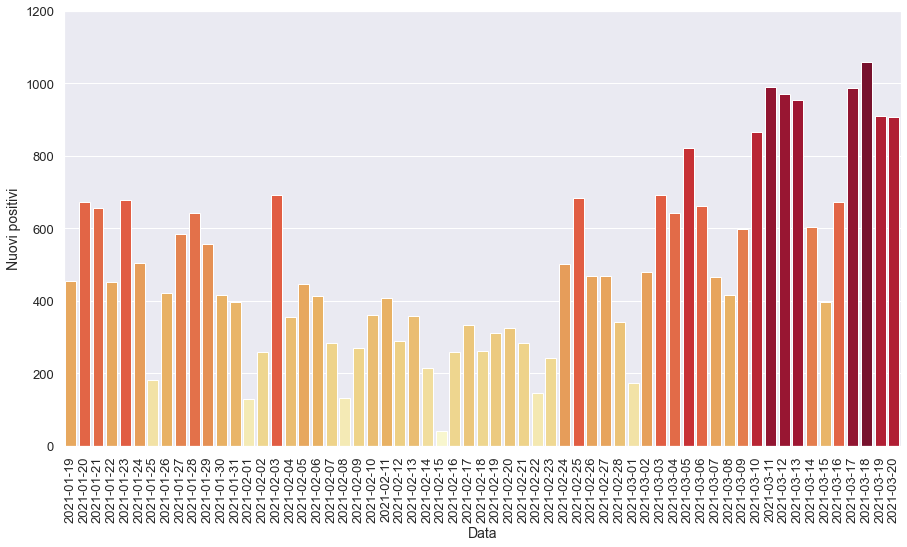

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

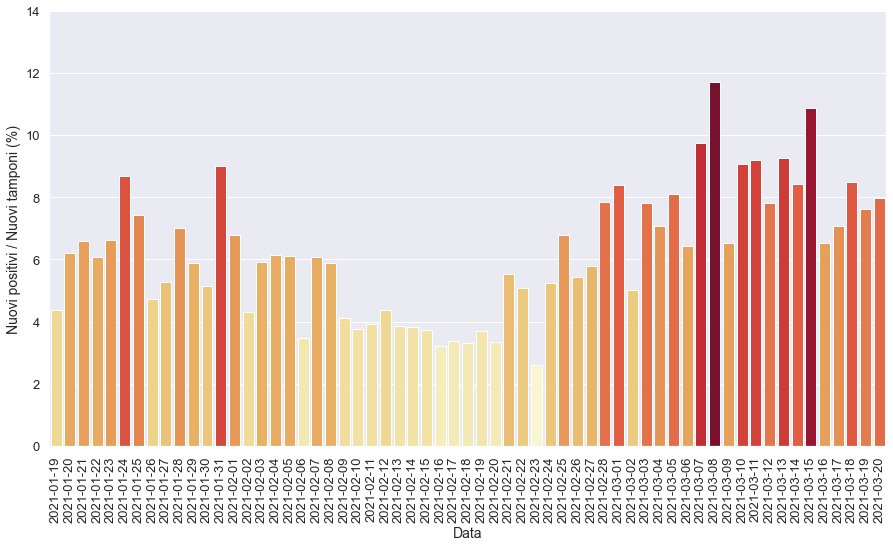

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

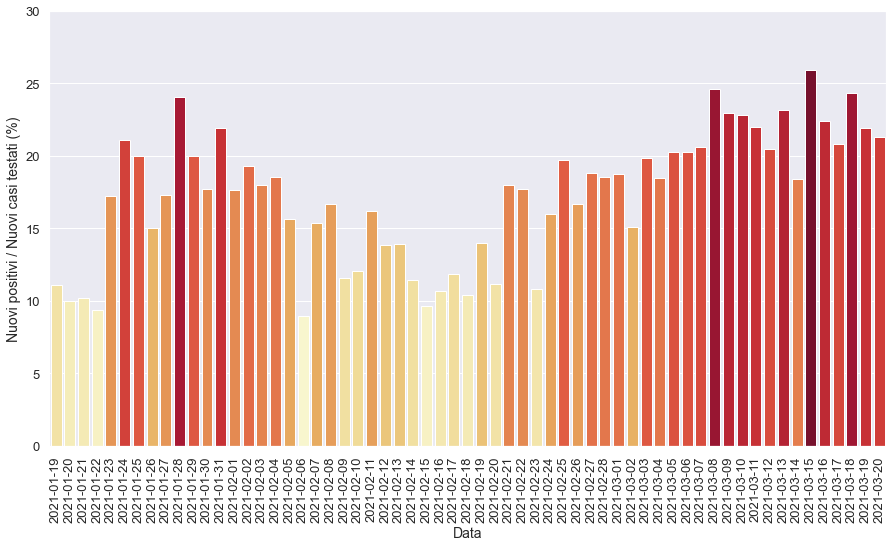

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

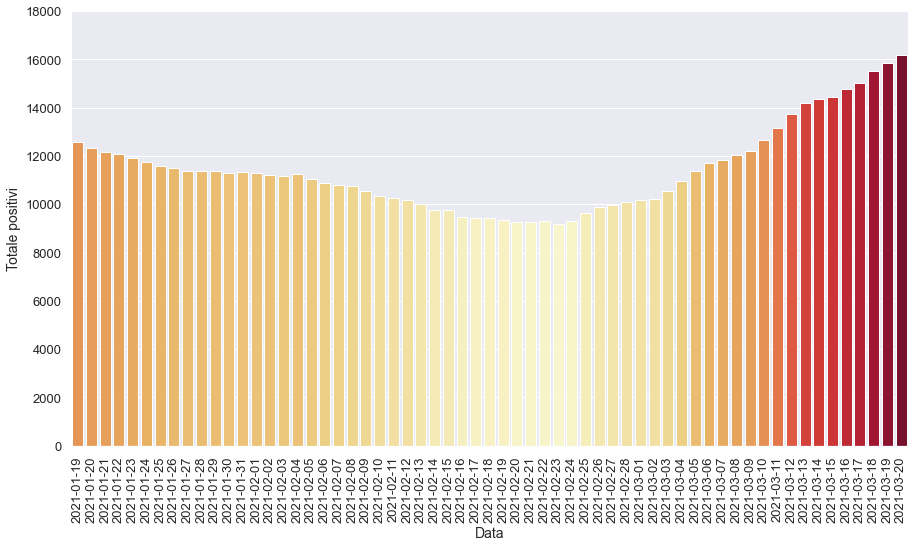

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

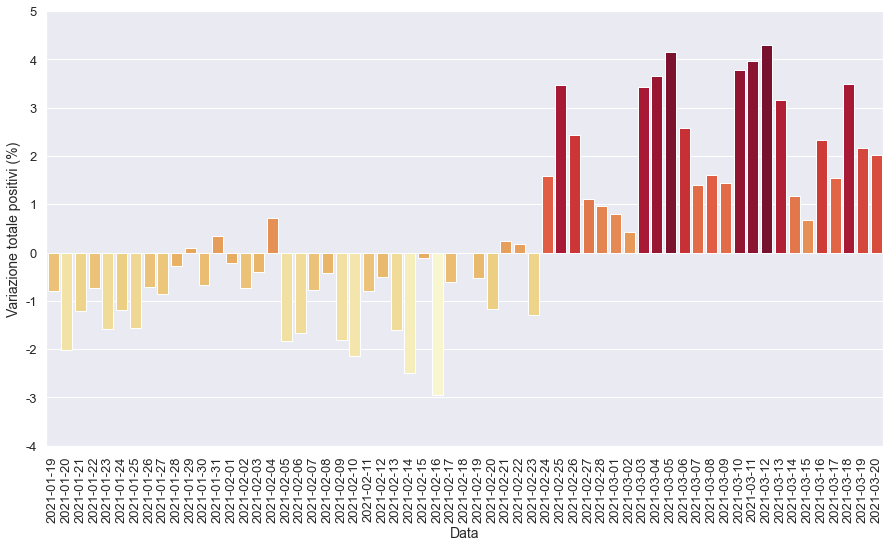

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

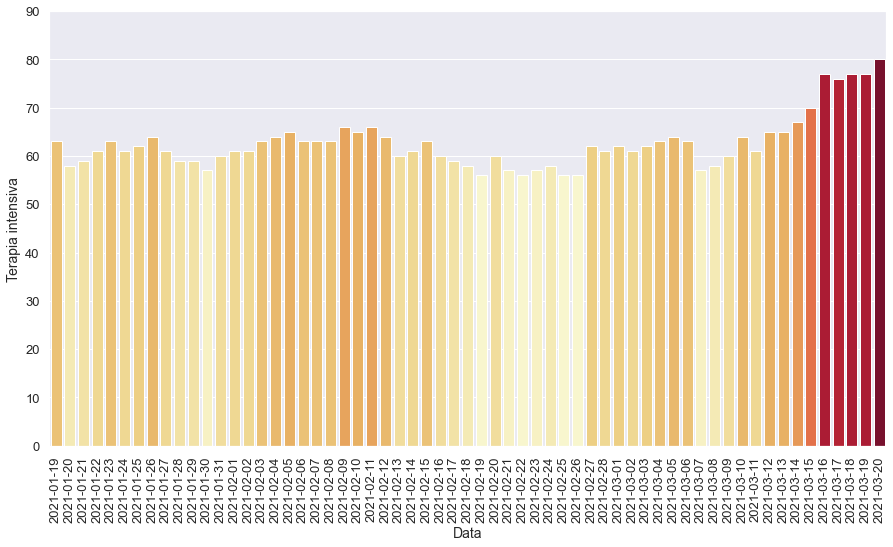

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

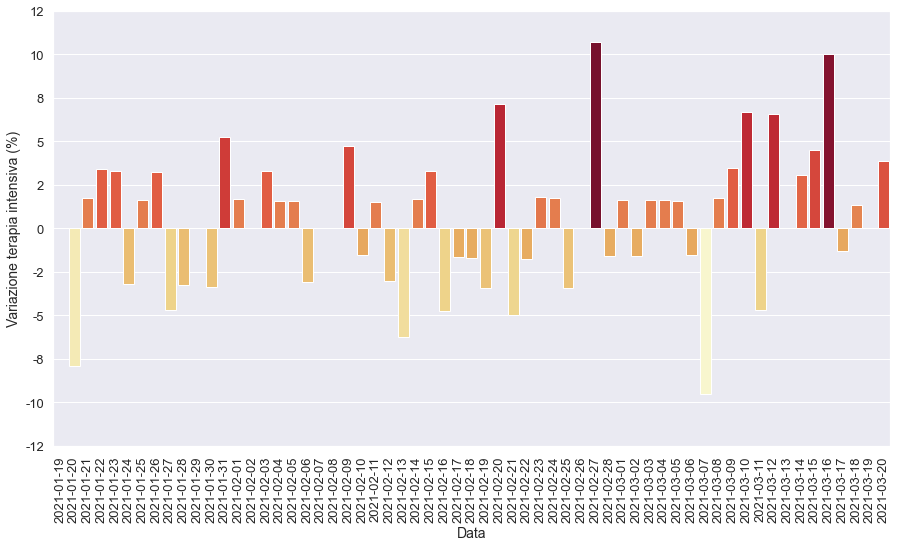

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

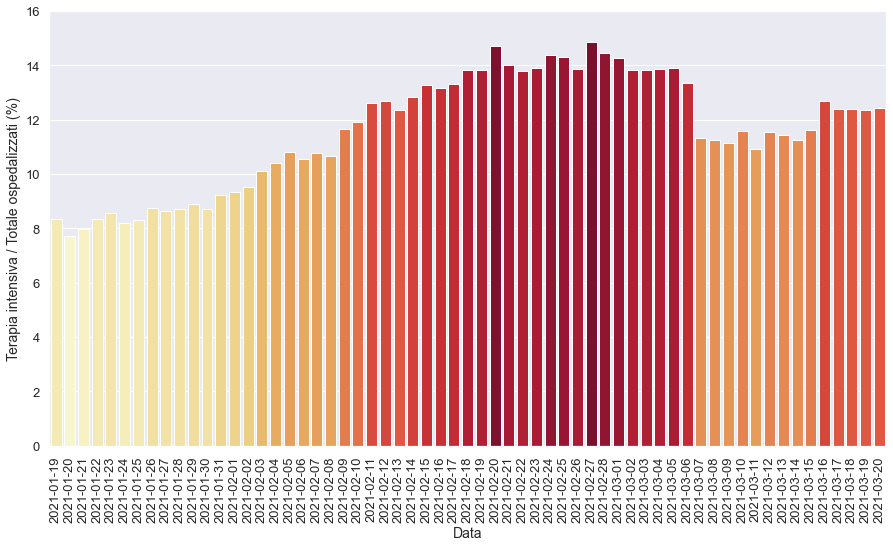

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

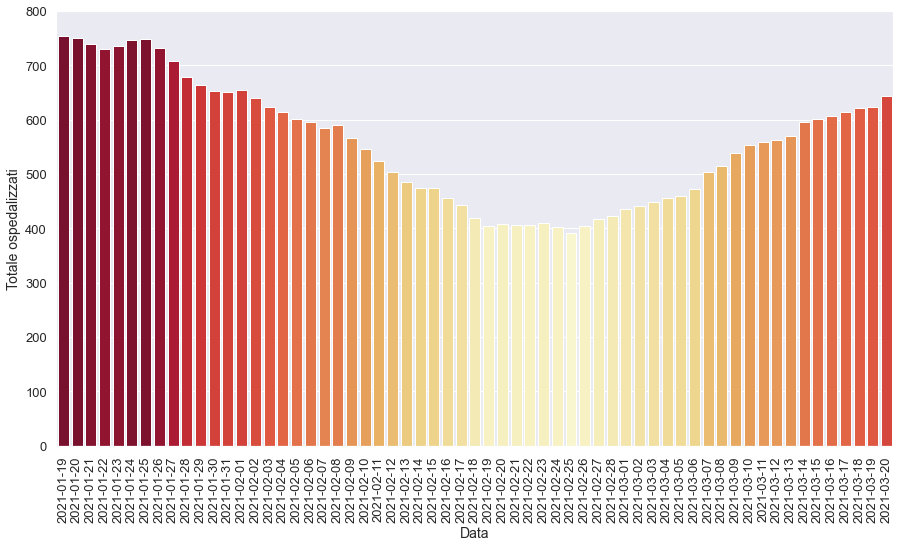

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

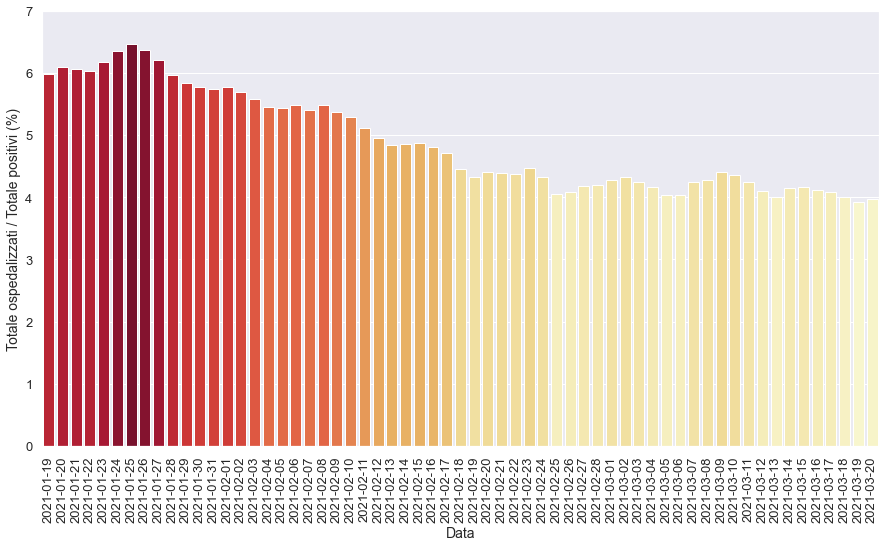

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

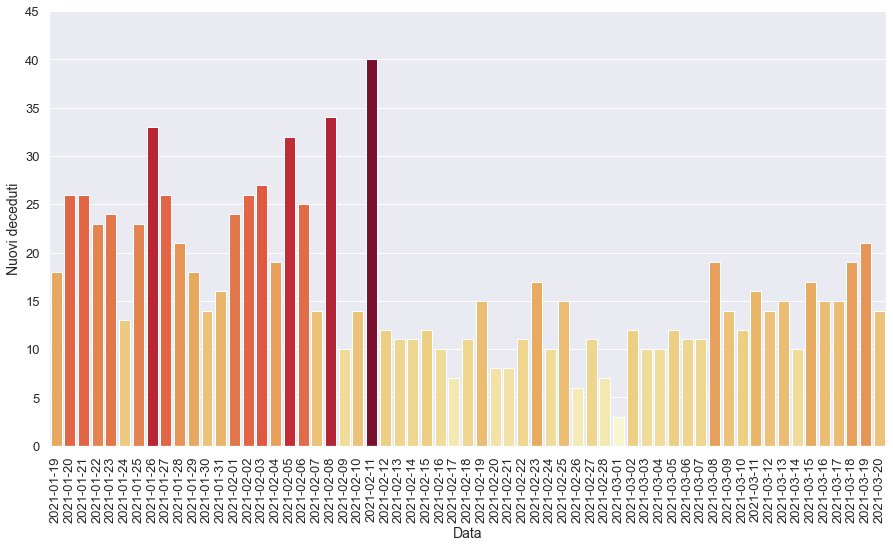

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

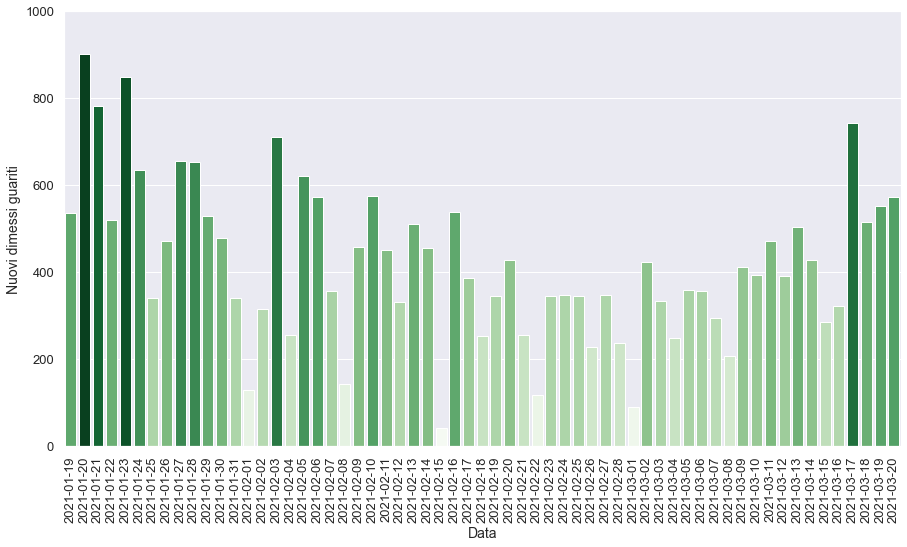

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-18T17:00:00,6,Friuli Venezia Giulia,361,58,419,8991,9410,-2,262,...,11.0,7885.0,2518.0,22.0,13.84,4.45,3.32,10.41,-1.69,-0.02
1,2021-02-19T17:00:00,6,Friuli Venezia Giulia,349,56,405,8956,9361,-49,310,...,15.0,8393.0,2218.0,-35.0,13.83,4.33,3.69,13.98,-3.45,-0.52
2,2021-02-20T17:00:00,6,Friuli Venezia Giulia,348,60,408,8844,9252,-109,326,...,8.0,9792.0,2918.0,-112.0,14.71,4.41,3.33,11.17,7.14,-1.16
3,2021-02-21T17:00:00,6,Friuli Venezia Giulia,350,57,407,8867,9274,22,284,...,8.0,5139.0,1576.0,23.0,14.00,4.39,5.53,18.02,-5.00,0.24
4,2021-02-22T17:00:00,6,Friuli Venezia Giulia,350,56,406,8885,9291,17,145,...,11.0,2857.0,818.0,18.0,13.79,4.37,5.08,17.73,-1.75,0.18
5,2021-02-23T17:00:00,6,Friuli Venezia Giulia,353,57,410,8761,9171,-120,241,...,17.0,9321.0,2223.0,-124.0,13.90,4.47,2.59,10.84,1.79,-1.29
6,2021-02-24T17:00:00,6,Friuli Venezia Giulia,345,58,403,8914,9317,146,503,...,10.0,9612.0,3148.0,153.0,14.39,4.33,5.23,15.98,1.75,1.59
7,2021-02-25T17:00:00,6,Friuli Venezia Giulia,335,56,391,9249,9640,323,683,...,15.0,10042.0,3469.0,335.0,14.32,4.06,6.80,19.69,-3.45,3.47
8,2021-02-26T17:00:00,6,Friuli Venezia Giulia,348,56,404,9471,9875,235,468,...,6.0,8591.0,2806.0,222.0,13.86,4.09,5.45,16.68,0.00,2.44
9,2021-02-27T17:00:00,6,Friuli Venezia Giulia,355,62,417,9568,9985,110,468,...,11.0,8079.0,2491.0,97.0,14.87,4.18,5.79,18.79,10.71,1.11


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

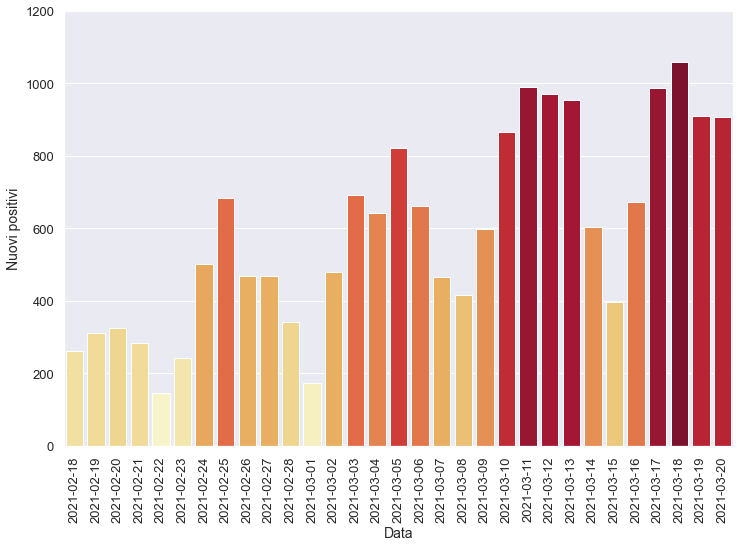

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

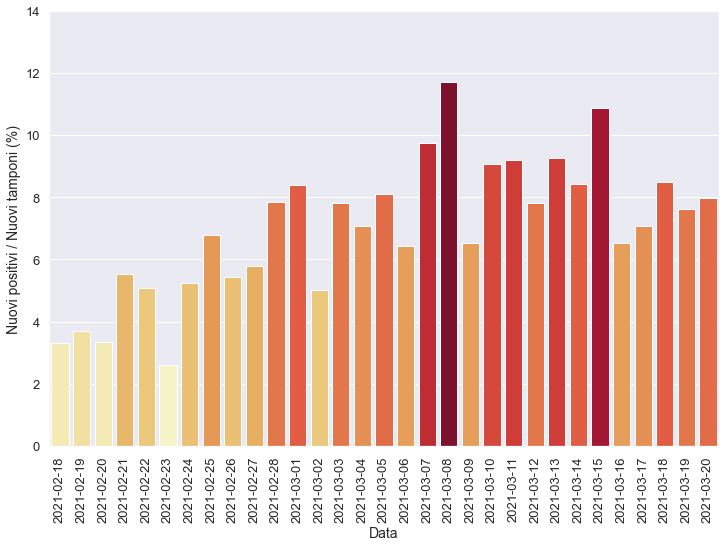

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

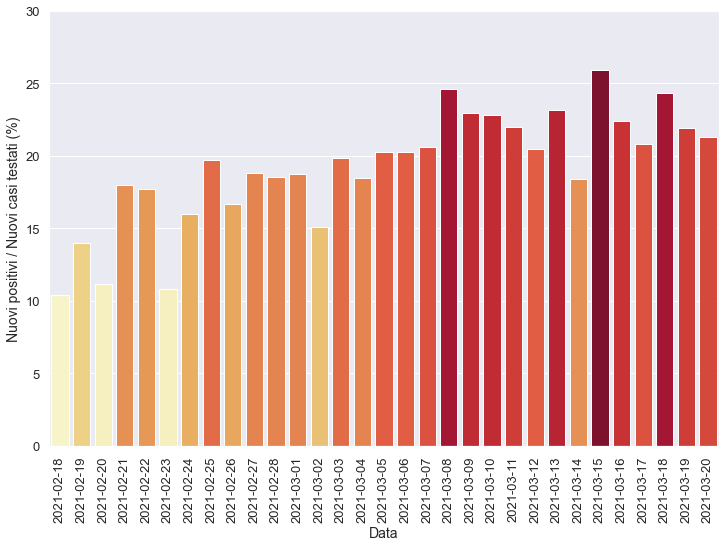

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

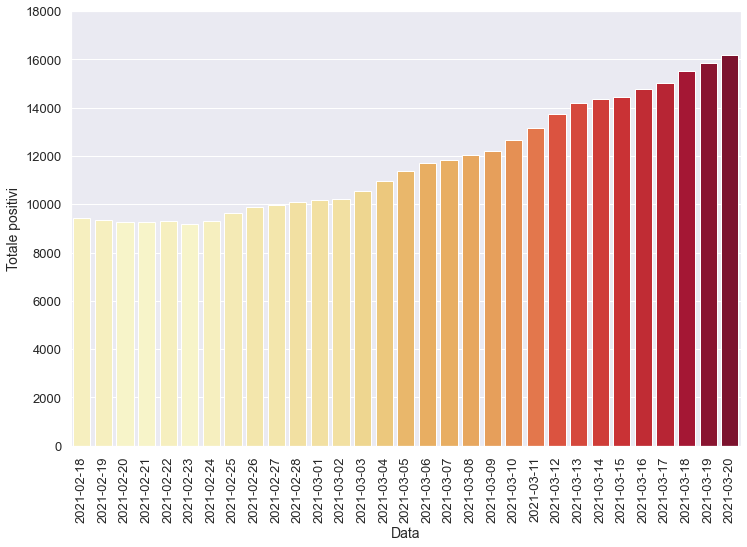

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

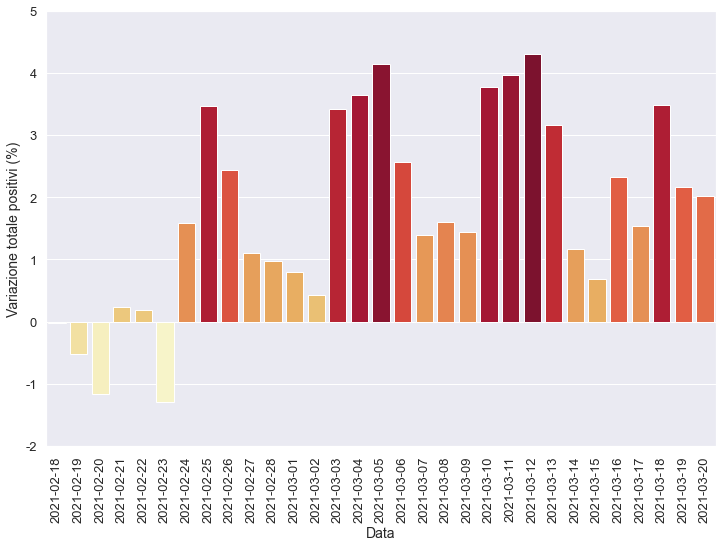

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

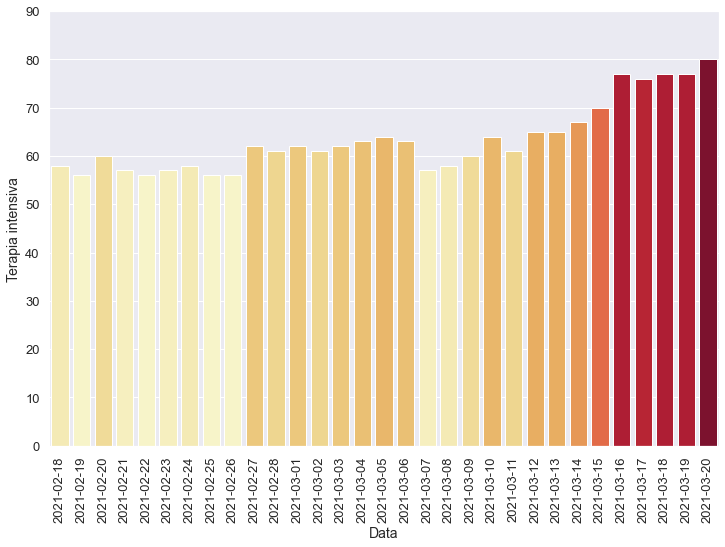

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

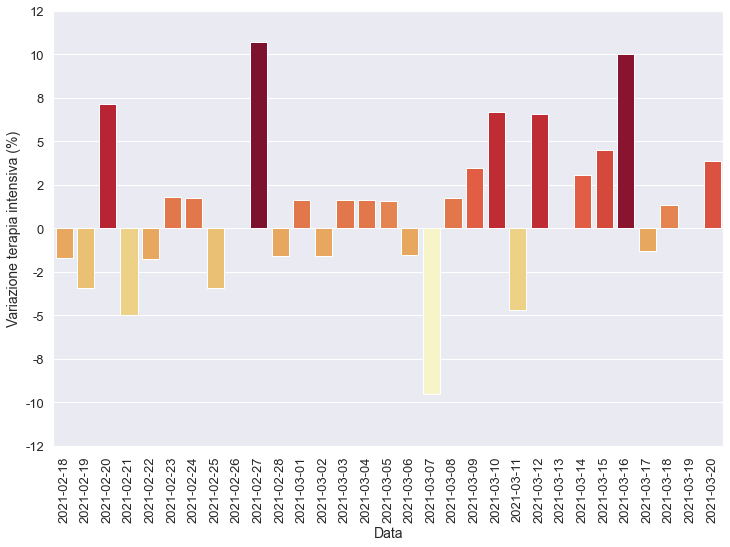

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

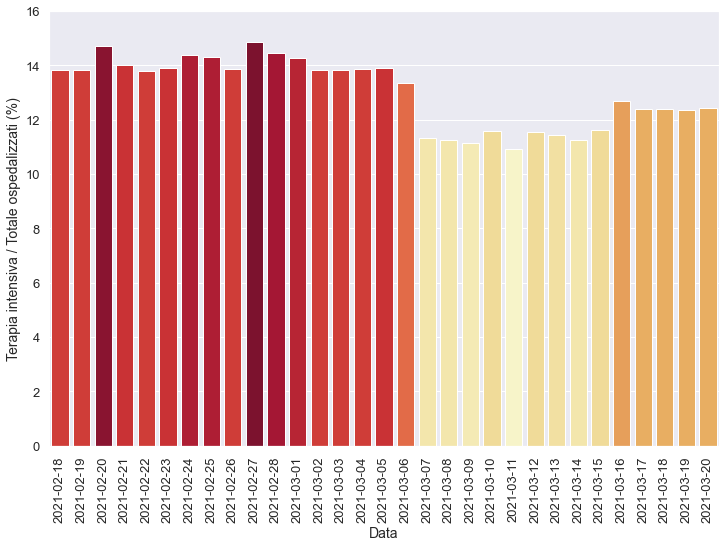

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

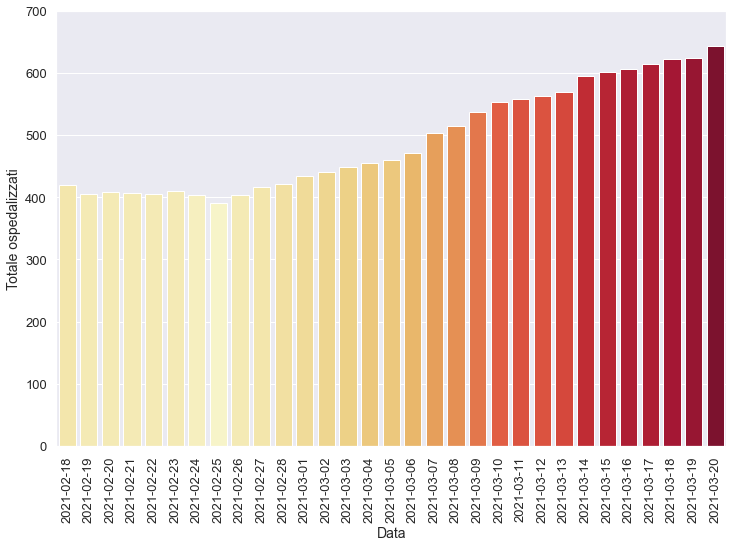

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

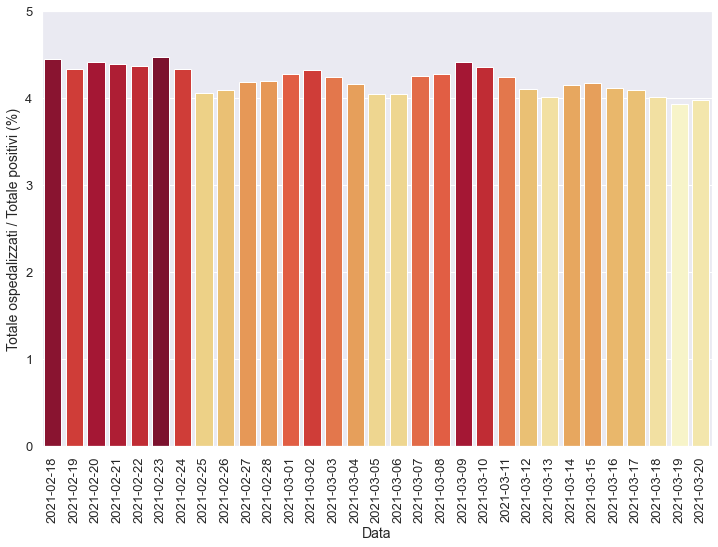

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

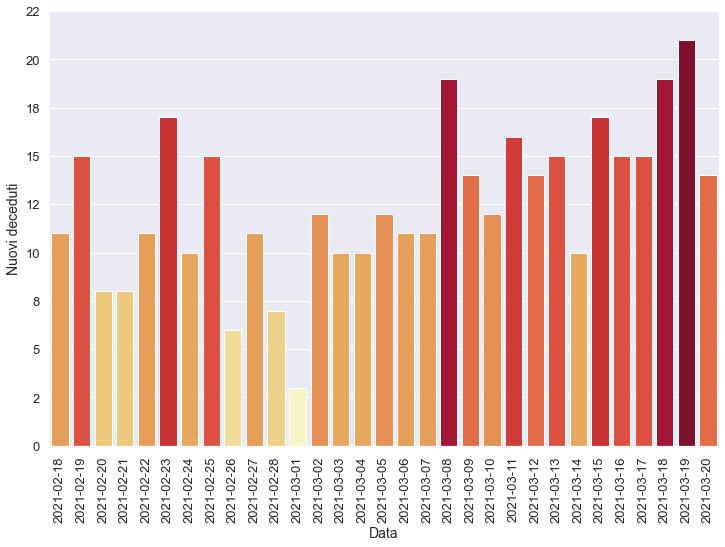

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

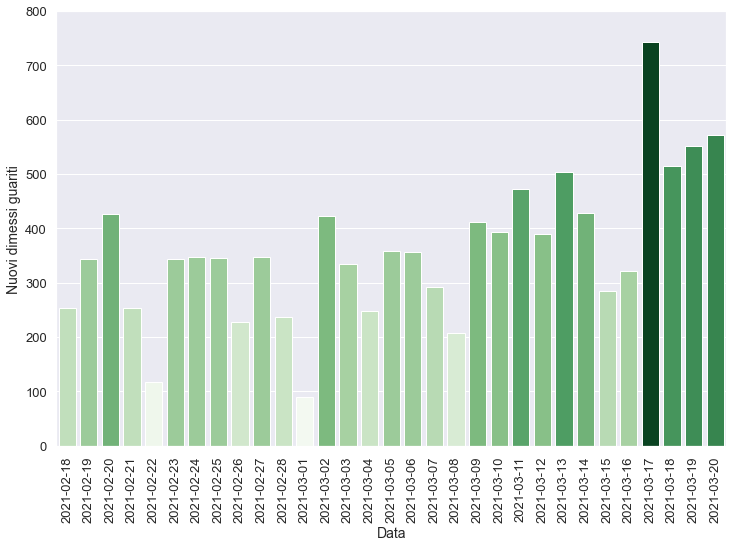

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-13T17:00:00,6,Friuli Venezia Giulia,504,65,569,13606,14175,434,953,...,15.0,10288.0,4114.0,428.0,11.42,4.01,9.26,23.16,0.00,3.16
1,2021-03-14T17:00:00,6,Friuli Venezia Giulia,528,67,595,13746,14341,166,604,...,10.0,7177.0,3277.0,140.0,11.26,4.15,8.42,18.43,3.08,1.17
2,2021-03-15T17:00:00,6,Friuli Venezia Giulia,532,70,602,13836,14438,97,398,...,17.0,3658.0,1534.0,90.0,11.63,4.17,10.88,25.95,4.48,0.68
3,2021-03-16T17:00:00,6,Friuli Venezia Giulia,530,77,607,14167,14774,336,672,...,15.0,10272.0,2998.0,331.0,12.69,4.11,6.54,22.41,10.00,2.33
4,2021-03-17T17:00:00,6,Friuli Venezia Giulia,538,76,614,14388,15002,228,986,...,15.0,13904.0,4732.0,221.0,12.38,4.09,7.09,20.84,-1.30,1.54
5,2021-03-18T17:00:00,6,Friuli Venezia Giulia,545,77,622,14904,15526,524,1058,...,19.0,12440.0,4347.0,516.0,12.38,4.01,8.50,24.34,1.32,3.49
6,2021-03-19T17:00:00,6,Friuli Venezia Giulia,547,77,624,15239,15863,337,910,...,21.0,11919.0,4158.0,335.0,12.34,3.93,7.63,21.89,0.00,2.17
7,2021-03-20T17:00:00,6,Friuli Venezia Giulia,564,80,644,15540,16184,321,906,...,14.0,11337.0,4257.0,301.0,12.42,3.98,7.99,21.28,3.90,2.02


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

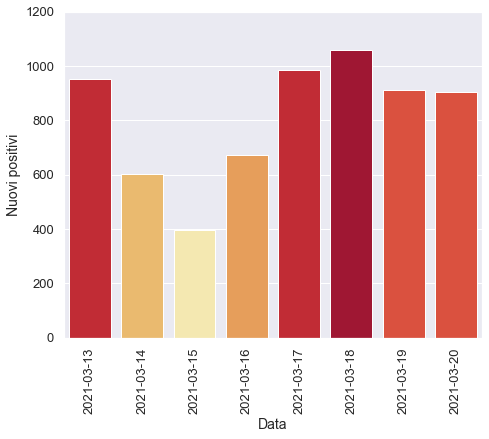

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

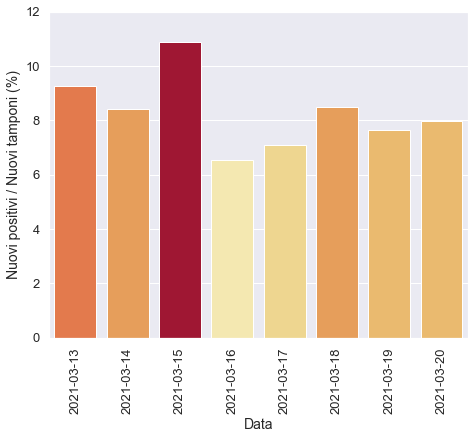

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

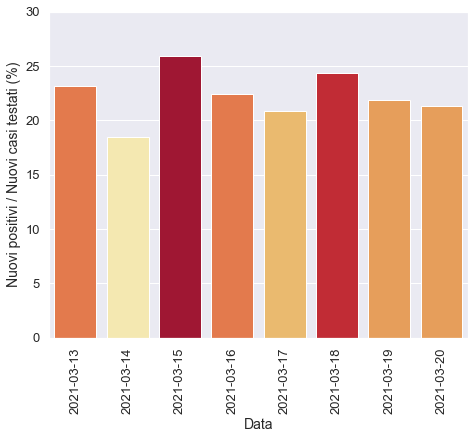

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

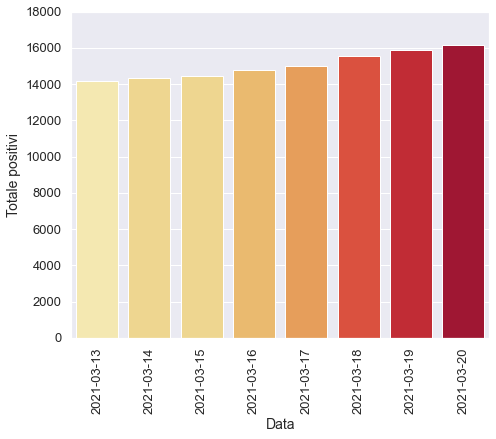

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

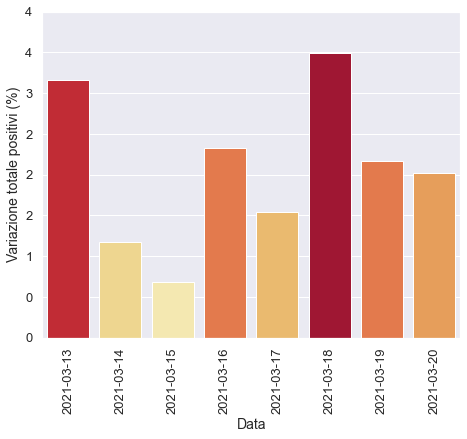

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

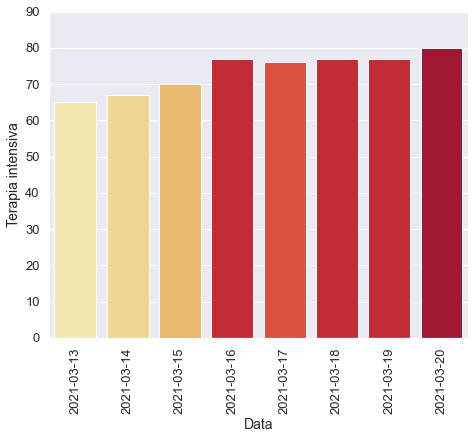

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

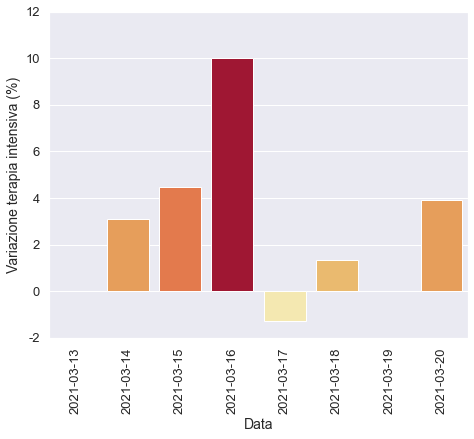

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

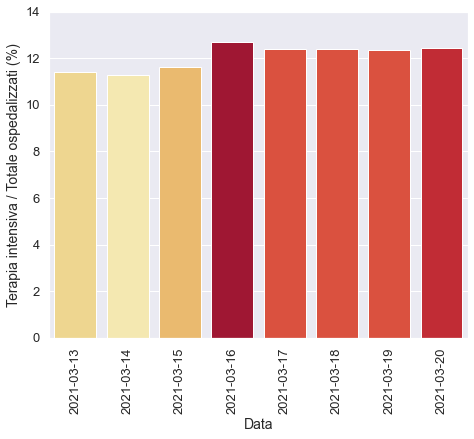

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

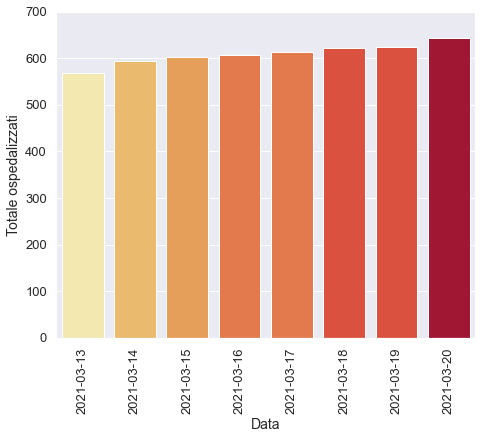

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

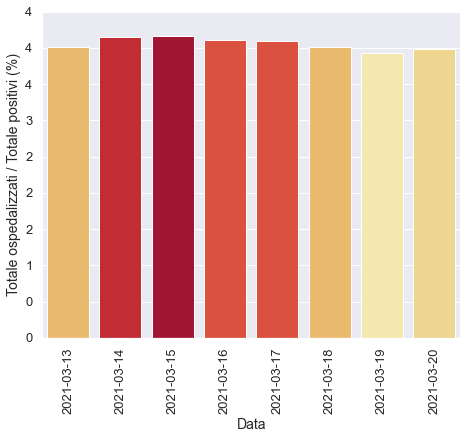

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

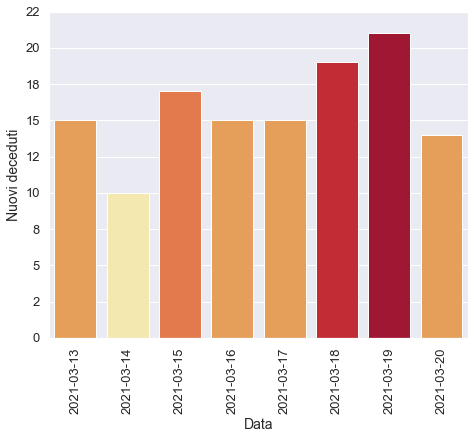

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

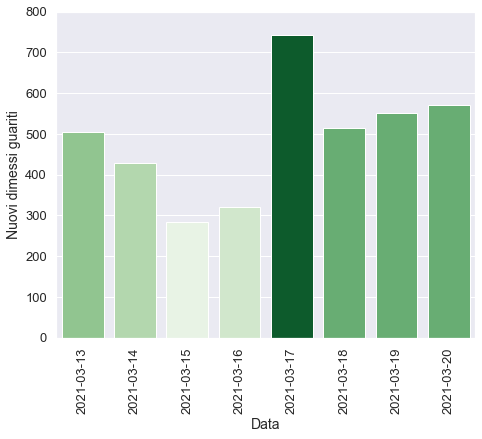

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)